In [144]:
## Importing required libraries
import sqlite3
import pandas as pd
import numpy as np
import math
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import sklearn
import statsmodels.miscmodels
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from time import time
from sklearn.decomposition import PCA, FastICA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings

import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingRegressor

warnings.simplefilter("ignore")

In [2]:
df_mat = pd.read_csv('student-mat.csv')
df_mat.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [3]:
df_por = pd.read_csv('student-por.csv')
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
df = pd.concat([df_por, df_mat])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
for i in np.unique(df['G3']):
    print(i, df[df['G3'] == i].shape)

0 (53, 33)
1 (1, 33)
4 (1, 33)
5 (8, 33)
6 (18, 33)
7 (19, 33)
8 (67, 33)
9 (63, 33)
10 (153, 33)
11 (151, 33)
12 (103, 33)
13 (113, 33)
14 (90, 33)
15 (82, 33)
16 (52, 33)
17 (35, 33)
18 (27, 33)
19 (7, 33)
20 (1, 33)


In [7]:
duplicates = df[df.duplicated(subset=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], keep='first')]
duplicates

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
155,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,22,9,7,6
161,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,3,3,2,2,1,5,16,9,9,8
195,GP,M,16,U,GT3,T,3,3,services,other,...,4,2,3,1,2,3,0,11,12,13
270,GP,M,16,U,GT3,T,4,4,services,services,...,5,3,2,1,2,5,4,14,15,15
376,GP,F,18,U,GT3,T,1,1,other,other,...,4,5,5,1,2,2,0,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,0,7,5,0
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
389,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16


In [8]:
df.drop("school", axis=1, inplace=True)
print(df.shape)
df.drop_duplicates()
df = df[df.G3 > 5]
df = df[df.G3 < 20]
print(df.shape)

(1044, 32)
(980, 32)


In [9]:
for i in np.unique(df['G3']):
    print(i, df[df['G3'] == i].shape)

6 (18, 32)
7 (19, 32)
8 (67, 32)
9 (63, 32)
10 (153, 32)
11 (151, 32)
12 (103, 32)
13 (113, 32)
14 (90, 32)
15 (82, 32)
16 (52, 32)
17 (35, 32)
18 (27, 32)
19 (7, 32)


In [10]:
num_df = df.select_dtypes(exclude=['object'])
cat_df = df.select_dtypes(include=['object'])
num_df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [11]:
# fig, axes = plt.subplots(4, 4, figsize=(20, 20))
# axes_flattened = axes.reshape(-1)
# for i in range(len(num_df.columns)):
#     ax = axes_flattened[i]
#     sns.scatterplot(
#         x=num_df.iloc[:, i],
#         y='G1',
#         data=num_df.dropna(),
#         ax=ax,
#     )
# fig.tight_layout(pad=1.0)

In [12]:
# fig, axes = plt.subplots(4, 4, figsize=(20, 20))
# axes_flattened = axes.reshape(-1)
# for i in range(len(num_df.columns)):
#     ax = axes_flattened[i]
#     sns.scatterplot(
#         x=num_df.iloc[:, i],
#         y='G2',
#         data=num_df.dropna(),
#         ax=ax,
#     )
# fig.tight_layout(pad=1.0)

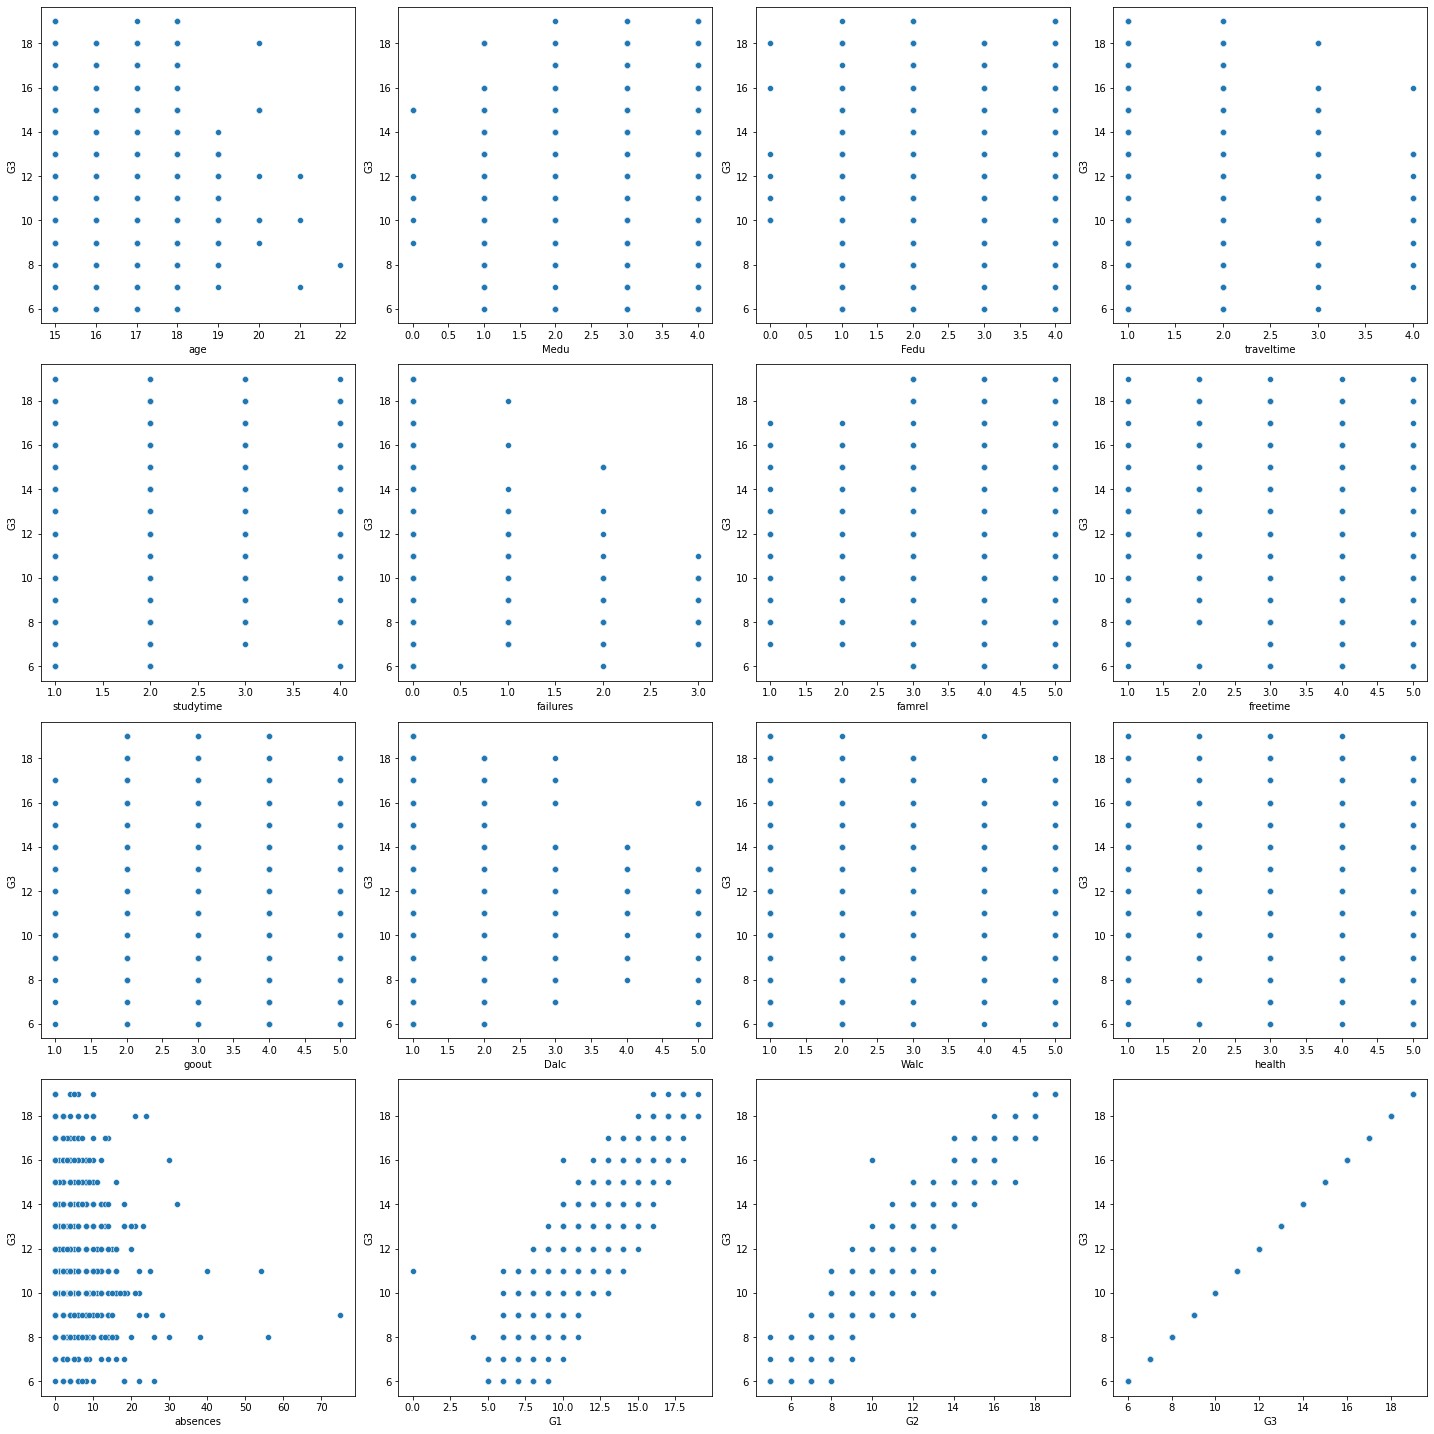

In [13]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='G3',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

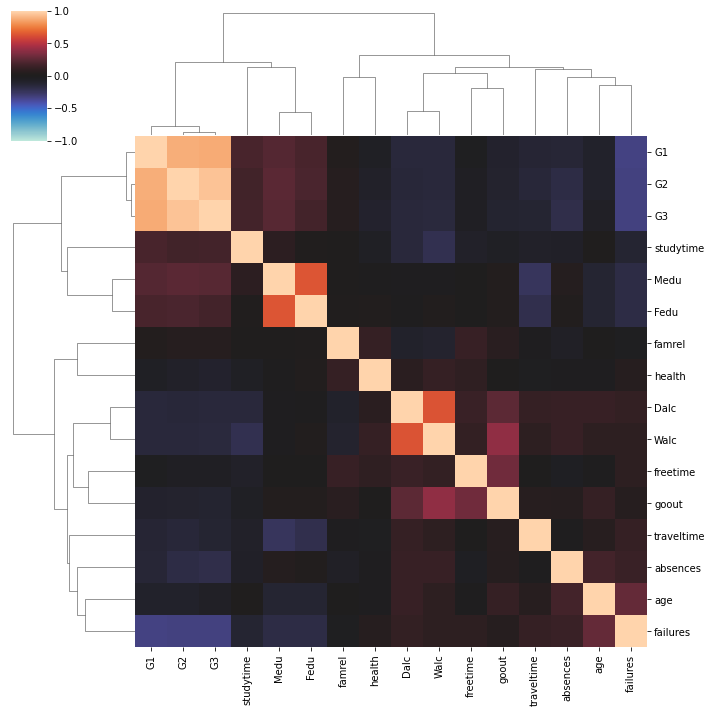

In [14]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )


corrplot(num_df, annot=None)


<AxesSubplot:>

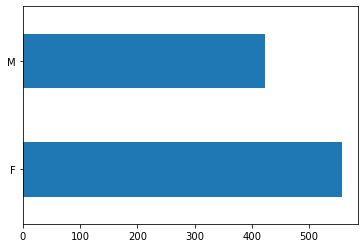

In [15]:
df.sex.value_counts().plot.barh()

In [16]:
label_encoder = LabelEncoder()
categ = ['sex', 'address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
df[categ] = df[categ].apply(label_encoder.fit_transform)
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,1,0,0,4,4,at_home,teacher,course,...,4,3,4,1,1,3,4,0,11,11
1,0,17,1,0,1,1,1,at_home,other,course,...,5,3,3,1,1,3,2,9,11,11
2,0,15,1,1,1,1,1,at_home,other,other,...,4,3,2,2,3,3,6,12,13,12
3,0,15,1,0,1,4,2,health,services,home,...,3,2,2,1,1,5,0,14,14,14
4,0,16,1,0,1,3,3,other,other,home,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,1,0,2,2,services,services,course,...,5,5,4,4,5,4,11,9,9,9
391,1,17,1,1,1,3,1,services,services,course,...,2,4,5,3,4,2,3,14,16,16
392,1,21,0,0,1,1,1,other,other,course,...,5,5,3,3,3,3,3,10,8,7
393,1,18,0,1,1,3,2,services,other,course,...,4,4,1,3,4,5,0,11,12,10


In [17]:
df = pd.get_dummies(data =df, columns=["Mjob","Fjob", 'reason','guardian'])
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,...,0,0,1,1,0,0,0,0,1,0
1,0,17,1,0,1,1,1,1,2,0,...,1,0,0,1,0,0,0,1,0,0
2,0,15,1,1,1,1,1,1,2,0,...,1,0,0,0,0,1,0,0,1,0
3,0,15,1,0,1,4,2,1,3,0,...,0,1,0,0,1,0,0,0,1,0
4,0,16,1,0,1,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,1,0,2,2,1,2,2,...,0,1,0,1,0,0,0,0,0,1
391,1,17,1,1,1,3,1,2,1,0,...,0,1,0,1,0,0,0,0,1,0
392,1,21,0,0,1,1,1,1,1,3,...,1,0,0,1,0,0,0,0,0,1
393,1,18,0,1,1,3,2,3,1,0,...,1,0,0,1,0,0,0,0,1,0


In [18]:
col = ['age','Medu', 'Fedu','traveltime', 'studytime','famrel','freetime', 'goout','Dalc','Walc','health','absences','failures']
df[col]= df[col].apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=0)
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0.428571,1,0,0,1.00,1.00,0.333333,0.333333,0.000000,...,0,0,1,1,0,0,0,0,1,0
1,0,0.285714,1,0,1,0.25,0.25,0.000000,0.333333,0.000000,...,1,0,0,1,0,0,0,1,0,0
2,0,0.000000,1,1,1,0.25,0.25,0.000000,0.333333,0.000000,...,1,0,0,0,0,1,0,0,1,0
3,0,0.000000,1,0,1,1.00,0.50,0.000000,0.666667,0.000000,...,0,1,0,0,1,0,0,0,1,0
4,0,0.142857,1,0,1,0.75,0.75,0.000000,0.333333,0.000000,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0.714286,1,1,0,0.50,0.50,0.000000,0.333333,0.666667,...,0,1,0,1,0,0,0,0,0,1
391,1,0.285714,1,1,1,0.75,0.25,0.333333,0.000000,0.000000,...,0,1,0,1,0,0,0,0,1,0
392,1,0.857143,0,0,1,0.25,0.25,0.000000,0.000000,1.000000,...,1,0,0,1,0,0,0,0,0,1
393,1,0.428571,0,1,1,0.75,0.50,0.666667,0.000000,0.000000,...,1,0,0,1,0,0,0,0,1,0


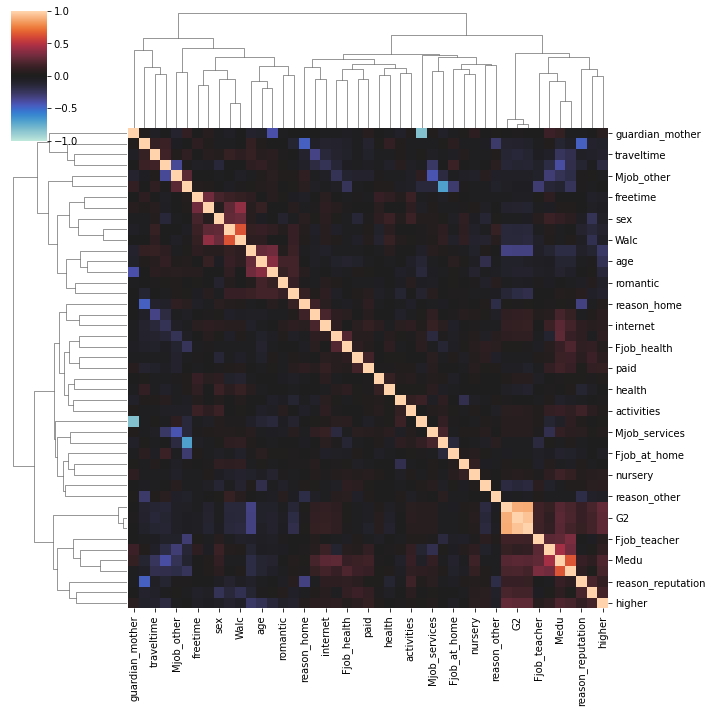

In [19]:
num_df = df.select_dtypes(exclude='object')
corrplot(num_df, annot=None)

In [20]:
num_df.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

<AxesSubplot:xlabel='edu', ylabel='G3'>

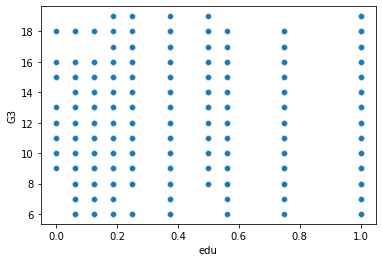

In [21]:
new_df = num_df.copy()
new_df['edu'] = (new_df['Fedu'])*(new_df['Medu'])
sns.scatterplot(x=new_df['edu'], y='G3',data=new_df)

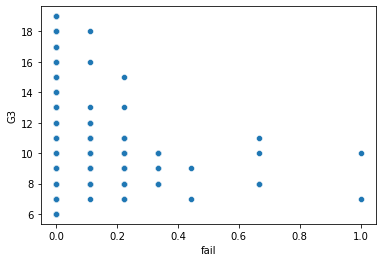

In [22]:
new_df['fail'] = (new_df['failures'])*(new_df['traveltime'])
sns.scatterplot(x=new_df['fail'], y='G3',data=new_df)
df['fail'] = new_df['fail']

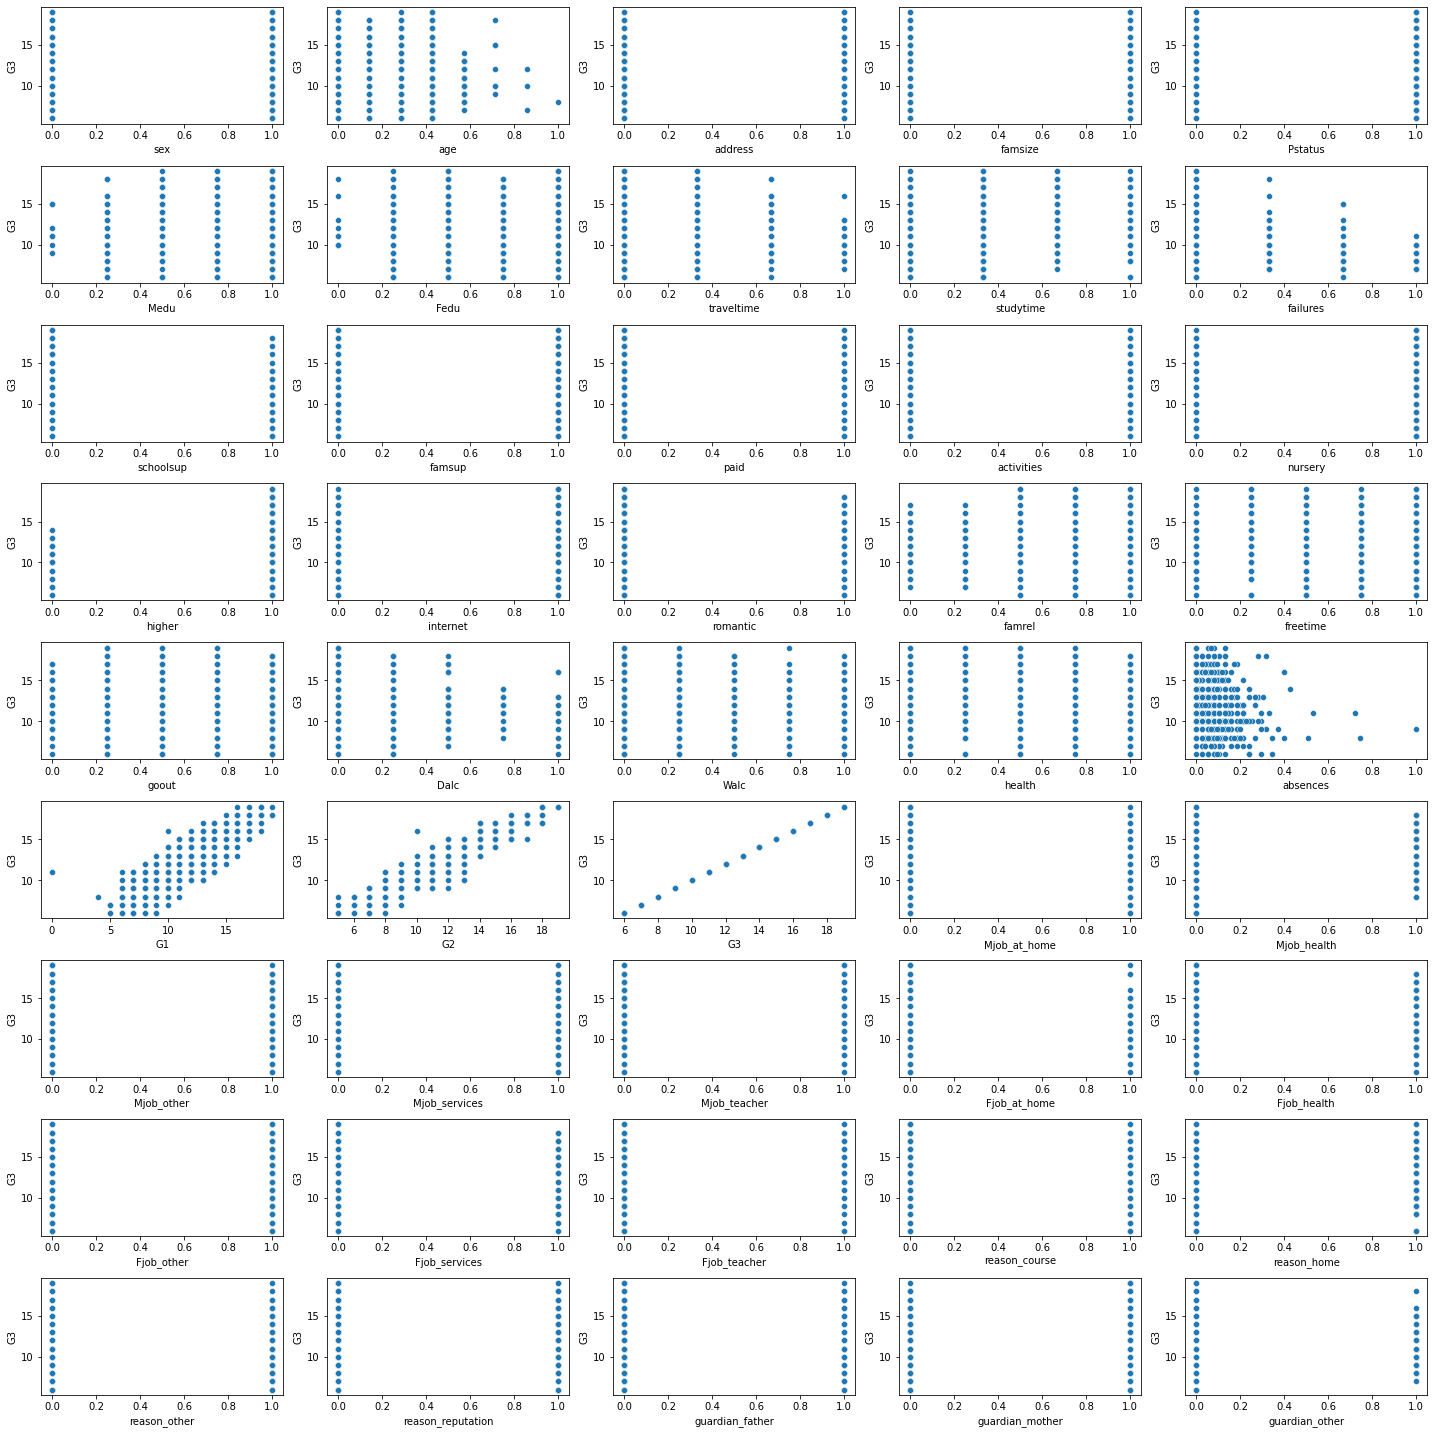

In [23]:
fig, axes = plt.subplots(9, 5, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='G3',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

In [24]:
for i in np.unique(df['G3']):
    print(i, df[df['G3'] == i].shape)

6 (18, 46)
7 (19, 46)
8 (67, 46)
9 (63, 46)
10 (153, 46)
11 (151, 46)
12 (103, 46)
13 (113, 46)
14 (90, 46)
15 (82, 46)
16 (52, 46)
17 (35, 46)
18 (27, 46)
19 (7, 46)


In [25]:
X = df.drop(["G1","G2","G3"], axis = 1)
y = df[["G1","G2","G3"]]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=12, stratify=y['G3'])
train_df = pd.concat([X_train, y_train])
train_df = X_train.copy()
train_df["G1"] = y_train["G1"]
train_df["G2"] = y_train["G2"]
train_df["G3"] = y_train["G3"]
test_df = pd.concat([X_test, y_test],axis=1)

In [26]:
X_train

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,fail
625,0,0.428571,1,0,1,0.50,0.75,0.333333,0.000000,0.000000,...,1,0,1,0,0,0,1,0,0,0.0
365,0,0.285714,1,0,0,1.00,0.75,0.000000,0.333333,0.000000,...,1,0,1,0,0,0,0,1,0,0.0
302,1,0.428571,0,0,1,0.75,0.50,0.000000,0.666667,0.000000,...,0,0,1,0,0,0,0,1,0,0.0
521,0,0.142857,0,0,1,0.50,0.75,0.333333,0.333333,0.000000,...,1,0,0,0,1,0,0,1,0,0.0
157,0,0.000000,1,1,0,0.50,0.25,0.333333,0.000000,0.000000,...,0,0,0,1,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0,0.000000,0,0,1,0.25,0.25,0.000000,0.000000,0.333333,...,1,0,0,0,1,0,0,1,0,0.0
12,1,0.000000,1,1,1,1.00,1.00,0.000000,0.000000,0.000000,...,1,0,1,0,0,0,1,0,0,0.0
290,0,0.571429,1,0,1,0.50,0.50,0.000000,0.333333,0.000000,...,1,0,0,1,0,0,0,1,0,0.0
107,1,0.142857,1,0,1,0.75,0.75,0.000000,0.666667,0.000000,...,0,0,0,1,0,0,1,0,0,0.0


In [27]:
print(X_train.shape)
X_train.head()

(735, 43)


,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,fail
625,0,0.428571,1,0,1,0.50,0.75,0.333333,0.000000,0.0,...,1,0,1,0,0,0,1,0,0,0.0
365,0,0.285714,1,0,0,1.00,0.75,0.000000,0.333333,0.0,...,1,0,1,0,0,0,0,1,0,0.0
302,1,0.428571,0,0,1,0.75,0.50,0.000000,0.666667,0.0,...,0,0,1,0,0,0,0,1,0,0.0
521,0,0.142857,0,0,1,0.50,0.75,0.333333,0.333333,0.0,...,1,0,0,0,1,0,0,1,0,0.0
157,0,0.000000,1,1,0,0.50,0.25,0.333333,0.000000,0.0,...,0,0,0,1,0,0,0,1,0,0.0


In [28]:
print(y_test.shape)
y_test.head()

(245, 3)


,G1,G2,G3
89,9,9,10
192,10,9,11
185,12,12,11
394,14,14,16
493,9,9,10


In [29]:
nan_df = (df.isnull().mean() * 100).reset_index()
nan_df

,index,0
0,sex,0.0
1,age,0.0
2,address,0.0
3,famsize,0.0
4,Pstatus,0.0
5,Medu,0.0
6,Fedu,0.0
7,traveltime,0.0
8,studytime,0.0
9,failures,0.0


In [30]:
def get_almost_constant_columns(df, dropna=True):
    cols = []
    for i in df:
        if dropna:
            counts = df[i].dropna().value_counts()
        else:
            counts = df[i].value_counts()
        most_popular_value_count = counts.iloc[0]
        if (most_popular_value_count / len(df)) * 100 > 96:
            cols.append(i)
    return cols

In [31]:
overfit_cat = get_almost_constant_columns(cat_df)
overfit_cat

[]

In [32]:
overfit_num = get_almost_constant_columns(num_df, dropna=True)
overfit_num

[]

In [33]:
train_df = train_df.drop(overfit_num, axis=1)
test_df = test_df.drop(overfit_num, axis=1)
X_train = X_train.drop(overfit_num, axis=1)
X_test = X_test.drop(overfit_num, axis=1)

In [34]:
train_df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,fail,G1,G2,G3
625,0,0.428571,1,0,1,0.50,0.75,0.333333,0.000000,0.0,...,0,0,0,1,0,0,0.0,10,10,10
365,0,0.285714,1,0,0,1.00,0.75,0.000000,0.333333,0.0,...,0,0,0,0,1,0,0.0,15,14,17
302,1,0.428571,0,0,1,0.75,0.50,0.000000,0.666667,0.0,...,0,0,0,0,1,0,0.0,10,11,12
521,0,0.142857,0,0,1,0.50,0.75,0.333333,0.333333,0.0,...,0,1,0,0,1,0,0.0,8,10,10
157,0,0.000000,1,1,0,0.50,0.25,0.333333,0.000000,0.0,...,1,0,0,0,1,0,0.0,11,10,10


In [35]:
X_train

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,fail
625,0,0.428571,1,0,1,0.50,0.75,0.333333,0.000000,0.000000,...,1,0,1,0,0,0,1,0,0,0.0
365,0,0.285714,1,0,0,1.00,0.75,0.000000,0.333333,0.000000,...,1,0,1,0,0,0,0,1,0,0.0
302,1,0.428571,0,0,1,0.75,0.50,0.000000,0.666667,0.000000,...,0,0,1,0,0,0,0,1,0,0.0
521,0,0.142857,0,0,1,0.50,0.75,0.333333,0.333333,0.000000,...,1,0,0,0,1,0,0,1,0,0.0
157,0,0.000000,1,1,0,0.50,0.25,0.333333,0.000000,0.000000,...,0,0,0,1,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0,0.000000,0,0,1,0.25,0.25,0.000000,0.000000,0.333333,...,1,0,0,0,1,0,0,1,0,0.0
12,1,0.000000,1,1,1,1.00,1.00,0.000000,0.000000,0.000000,...,1,0,1,0,0,0,1,0,0,0.0
290,0,0.571429,1,0,1,0.50,0.50,0.000000,0.333333,0.000000,...,1,0,0,1,0,0,0,1,0,0.0
107,1,0.142857,1,0,1,0.75,0.75,0.000000,0.666667,0.000000,...,0,0,0,1,0,0,1,0,0,0.0


In [36]:
X_test

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,fail
89,1,0.142857,1,1,0,1.00,1.00,0.000000,0.333333,0.000000,...,0,0,0,0,0,1,0,1,0,0.000000
192,1,0.142857,0,0,1,1.00,0.50,0.000000,0.000000,0.000000,...,1,0,0,0,1,0,0,1,0,0.000000
185,1,0.285714,1,0,1,0.75,0.75,0.000000,0.333333,0.000000,...,1,0,0,0,1,0,0,1,0,0.000000
394,0,0.285714,0,0,0,0.75,0.50,0.000000,0.333333,0.000000,...,0,0,0,1,0,0,0,1,0,0.000000
493,0,0.285714,1,0,1,0.00,0.25,0.333333,0.000000,0.000000,...,0,0,1,0,0,0,1,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,0,0.142857,1,1,1,1.00,1.00,0.333333,0.000000,0.000000,...,1,0,0,0,1,0,1,0,0,0.000000
280,1,0.428571,0,1,1,0.75,0.75,0.000000,0.333333,0.000000,...,1,0,1,0,0,0,0,1,0,0.000000
444,1,0.142857,0,0,1,0.75,1.00,0.666667,0.333333,0.000000,...,0,0,0,0,1,0,0,1,0,0.000000
307,1,0.571429,1,0,1,1.00,1.00,0.333333,0.000000,0.333333,...,1,0,0,0,0,1,0,0,1,0.111111


In [37]:
y_test

,G1,G2,G3
89,9,9,10
192,10,9,11
185,12,12,11
394,14,14,16
493,9,9,10
...,...,...,...
529,11,11,11
280,10,9,10
444,9,10,11
307,8,9,8


In [57]:
clf = linear_model.LogisticRegression(penalty='l2')
clf.fit(X_train, y_train['G3'])
clf.score(X_test, y_test['G3'])

0.16326530612244897

In [76]:
clf = linear_model.LogisticRegression(penalty='l1',solver='saga')
clf.fit(X_train, y_train['G3'])
print(clf.score(X_test, y_test['G3']))
log_pred = clf.predict(X_test)

0.1510204081632653


In [40]:
log_pred

array([12, 12, 12, 13, 11, 10, 11, 15, 10, 11, 13, 13,  8, 15, 11, 11, 14,
       10, 15, 10, 10, 10, 10, 15,  8, 10, 11,  8, 13, 15,  9, 10, 14, 15,
       11, 11, 11, 14, 13, 17, 11, 11, 10, 11, 13, 14, 13,  9, 10, 13, 11,
       12, 13, 13, 15, 13, 12, 11, 12, 13, 14, 10, 11, 11, 14,  8, 10,  8,
       11, 11, 13, 10, 10, 11, 15, 14, 10, 11, 14, 13, 11, 14, 15, 14, 10,
       13, 10, 11, 12, 11, 13, 15, 12, 12, 13, 10, 12, 10, 13, 11, 12, 13,
       11, 11, 10, 15, 12, 10,  9,  8,  8, 11, 11,  8, 11, 13, 11, 11, 14,
        8, 16,  8, 10, 10, 15, 10, 15, 14, 12, 10, 10, 10, 12, 13, 11, 11,
       14, 10, 13, 11, 10, 10, 11, 15, 11, 10, 13, 15, 11, 12, 11,  8, 15,
       13, 11, 10, 18,  7, 11, 11, 18, 11, 12, 15, 10, 17, 10, 10, 11, 11,
       15, 11, 11, 16, 13, 11, 11, 11, 14, 12, 15, 10, 11, 15, 11, 14, 12,
        8,  9, 15, 11, 13, 16, 13, 10, 13, 10, 10, 15, 11, 14, 15, 12, 15,
       10, 10, 15, 13, 16, 14, 11,  8, 12, 14, 12, 10, 14, 10, 14,  8,  8,
       11, 14, 10, 15, 10

In [125]:
lasso = linear_model.Lasso(alpha=0.008)
lasso.fit(X_train, y_train['G3'])
y_pred_lasso = lasso.predict(X_test)
print(lasso.score(X_test, y_test['G3']))
r2_score_lasso = metrics.r2_score(y_test['G3'], y_pred_lasso.round())
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

0.2739469037295158
Lasso(alpha=0.008)
r^2 on test data : 0.274255


In [42]:
#res = pd.DataFrame(y_pred_lasso)
res = pd.DataFrame(y_test['G3'])
res['y_pred'] = y_pred_lasso.round()
res.head(100)

,G3,y_pred
89,10,13.0
192,11,12.0
185,11,12.0
394,16,13.0
493,10,11.0
...,...,...
468,13,13.0
240,17,13.0
579,9,11.0
260,18,12.0


In [43]:
lin = linear_model.LinearRegression()
lin.fit(X_train, y_train['G3'])
print(lin.score(X_test, y_test['G3']))
lin_pred = lin.predict(X_test)
print(metrics.accuracy_score(y_test['G3'], lin_pred.copy().round()))


0.2626980920761097
0.2


In [44]:
print(lin.score(X_test, y_test['G3']))
print(lin.score(X_train, y_train['G3']))

0.2626980920761097
0.30031896789744217


In [45]:
lin_pred.round()

array([13., 11., 12., 13., 11., 10., 10., 14., 10., 13., 14., 12., 10.,
       14., 11., 12., 14.,  9., 14.,  9., 11., 12., 10., 13., 11., 12.,
       12., 12., 13., 13., 11., 12., 15., 12., 13., 12., 13., 14., 14.,
       13., 12., 13., 12., 12., 12., 13., 14., 12., 10., 14., 11., 13.,
       13., 11., 16., 12., 13., 11., 12., 13., 14., 10., 12., 13., 13.,
        9., 11.,  9., 12., 12., 13., 12., 11., 11., 14., 12., 13., 13.,
       14., 12., 13., 14., 13., 14., 11., 15., 13., 12., 11., 12., 13.,
       13., 12., 13., 13., 13., 13., 11., 12., 13., 12., 13., 12., 12.,
        8., 13., 12., 12., 11., 12., 11., 12., 12.,  9., 12., 13., 12.,
       12., 13.,  9., 13., 11., 10., 11., 14., 11., 15., 10., 14.,  9.,
       10., 11., 13., 13., 12., 11., 13., 10., 13., 11., 11., 10., 13.,
       14., 12., 10., 12., 13., 12., 11., 11.,  7., 15., 12., 14., 13.,
       14.,  8., 11., 12., 13., 14., 12., 14., 11., 13., 12., 10., 13.,
       13., 14., 13., 12., 13., 13., 12., 11., 13., 14., 12., 14

<AxesSubplot:xlabel='G3'>

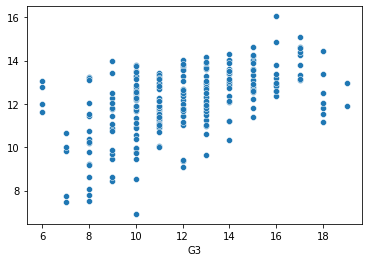

In [46]:
sns.scatterplot(x=y_test['G3'], y=lin_pred)

In [47]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [129]:
fig0 = go.Figure()
fig0.add_trace(go.Scatter(y=y_test['G3'], x=y_pred_lasso,mode='markers'))
fig0.add_trace(go.Scatter(x=y_test['G3'], y=y_test['G3']))
fig0.show()

In [130]:
fig0 = go.Figure()
fig0.add_trace(go.Scatter(y=y_test['G3'], x=y_pred_lasso.round(),mode='markers'))
fig0.add_trace(go.Scatter(x=y_test['G3'], y=y_test['G3']))
fig0.show()

In [48]:
print(lin.score(X_test, y_test['G3']))
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test['G3'], y=lin_pred,mode='markers'))
fig.add_trace(go.Scatter(x=y_test['G3'], y=y_test['G3']))
fig.show()

0.2626980920761097


In [49]:
print(metrics.accuracy_score(y_test['G3'], lin_pred.copy().round()))
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=y_test['G3'], y=lin_pred.round(),mode='markers'))
fig1.add_trace(go.Scatter(x=y_test['G3'], y=y_test['G3']))
fig1.show()

0.2


In [141]:
GB = GradientBoostingRegressor(loss='huber',learning_rate=0.094, random_state=8, n_estimators=100)
GB.fit(X_train, y_train['G3'])
GB_pred = GB.predict(X_test)
print(GB.score(X_test, y_test['G3']))
print(metrics.adjusted_rand_score(y_test['G3'], GB_pred.copy()))
print(metrics.mean_squared_log_error(y_test['G3'], GB_pred.copy()))
print(metrics.classification_report(y_test['G3'], GB_pred.copy().round()))

0.298375776024414
-0.0002005714899346404
0.0352344336211981
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         4
           7       1.00      0.20      0.33         5
           8       1.00      0.06      0.11        17
           9       0.29      0.25      0.27        16
          10       0.27      0.11      0.15        38
          11       0.19      0.18      0.19        38
          12       0.15      0.35      0.20        26
          13       0.08      0.21      0.12        28
          14       0.21      0.32      0.25        22
          15       0.29      0.10      0.15        20
          16       0.50      0.08      0.13        13
          17       0.00      0.00      0.00         9
          18       0.00      0.00      0.00         7
          19       0.00      0.00      0.00         2

    accuracy                           0.17       245
   macro avg       0.28      0.13      0.14       245
weighted avg       0

In [116]:
fig3 = go.Figure()
fig3.add_trace(go.Scatter(y=y_test['G3'], x=(GB_pred.copy()),mode='markers'))
fig3.add_trace(go.Scatter(x=y_test['G3'], y=y_test['G3']))
fig3.show()

In [115]:
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=y_test['G3'], y=(GB_pred.copy()),mode='markers'))
fig4.add_trace(go.Scatter(x=y_test['G3'], y=y_test['G3']))
fig4.show()

In [117]:
kor_col= ['studytime', 'Medu', 'Fedu', 'Dalc', 'Walc','failures','Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher']

In [136]:
GB = GradientBoostingRegressor(loss='huber',learning_rate=0.07)
GB.fit(X_train[kor_col], y_train['G3'])
GB_pred = GB.predict(X_test[kor_col])
GB.score(X_test[kor_col], y_test['G3'])

0.16650331636102056

In [160]:
from sklearn.base import clone


class OrdinalClassifier():
    
    def __init__(self, clf):
        self.clf = clf
        self.clfs = {}
    
    def fit(self, X, y):
        self.unique_class = np.sort(np.unique(y))
        if self.unique_class.shape[0] > 2:
            for i in range(self.unique_class.shape[0]-1):
                binary_y = (y > self.unique_class[i]).astype(np.uint8)
                clf = clone(self.clf)
                clf.fit(X, binary_y)
                self.clfs[i] = clf
    
    def predict_proba(self, X):
        clfs_predict = {k+6:self.clfs[k].predict_proba(X) for k in self.clfs}
        predicted = []
        for i,y in enumerate(self.unique_class):
            if i == 0:
                predicted.append(1 - clfs_predict[y][:,1])
            elif y in clfs_predict:
                 predicted.append(clfs_predict[y-1][:,1] - clfs_predict[y][:,1])
            else:
                predicted.append(clfs_predict[y-1][:,1])
        return np.vstack(predicted).T
    
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

In [161]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [162]:
clf = OrdinalClassifier(GradientBoostingClassifier(max_depth=3))
#clf = OrdinalClassifier(DecisionTreeClassifier(max_depth=3))
#clf = OrdinalClassifier(RandomForestClassifier())
#clf = OrdinalClassifier(KNeighborsClassifier(n_neighbors=3, weights="distance"))
#clf = OrdinalClassifier(AdaBoostClassifier())

In [163]:
clf.fit(X_train, y_train['G3'])
clf_pred = clf.predict(X_test)+6
print(metrics.accuracy_score(y_test['G3'], clf_pred))
print(metrics.classification_report(y_test['G3'], clf_pred.copy()))

0.17142857142857143
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         5
           8       0.08      0.06      0.07        17
           9       0.09      0.06      0.07        16
          10       0.22      0.24      0.23        38
          11       0.27      0.29      0.28        38
          12       0.09      0.08      0.08        26
          13       0.30      0.29      0.29        28
          14       0.14      0.18      0.16        22
          15       0.14      0.20      0.16        20
          16       0.05      0.08      0.06        13
          17       0.17      0.11      0.13         9
          18       0.00      0.00      0.00         7
          19       0.00      0.00      0.00         2

    accuracy                           0.17       245
   macro avg       0.11      0.11      0.11       245
weighted avg       0.16      0.17      0.17       245



In [155]:
fig6 = go.Figure()
fig6.add_trace(go.Scatter(x=y_test['G3'], y=clf_pred.copy(),mode='markers'))
fig6.add_trace(go.Scatter(x=y_test['G3'], y=y_test['G3']))
fig6.show()